# Table of Contents
- Import libraries
- Set path
- Import Data
- Checking for Security Implications
- Create a regional column and analyse spending habits
- Create low-activity exclusion flag and excluded from data set
- Create customer profiles crosstabs
- Visualisations
- Export final data

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Set path

In [2]:
#Define the path
path = r'/Users/aibee/Desktop/CareerFoundry/4. Python Fundamentals for Data Analysts/24-05-2022 Instacart Basket Analysis'

# 1. Import Data

In [3]:
#import data
df_complete = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_final.pkl'))

In [4]:
#check the shape of the imported dataframe
df_complete.shape

(32404859, 32)

# 2. Checking for Security Implications

In [5]:
# Check the output for PII
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   order_number            int8    
 3   orders_day_of_week      int8    
 4   order_time_of_day       int8    
 5   days_since_prior_order  float16 
 6   product_id              float64 
 7   add_to_cart_order       float64 
 8   reordered               float64 
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  busiest_day             object  
 15  Busiest_days            object  
 16  busiest_period_of_day   object  
 17  first_name              object  
 18  last_name               object  
 19  gender                  object  
 20  state                   object  
 21  age   

In [6]:
df_complete.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,no_of_dependents,marital_status,income,max_order,loyalty_flag,avg_price,spender_flag,median_order_duration,frequency_flag
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,2/17/2019,3,married,40423,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,2/17/2019,3,married,40423,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,2/17/2019,3,married,40423,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,2/17/2019,3,married,40423,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,2/17/2019,3,married,40423,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


#### The most important Personal Identification Information is can be found in the first_name and the last_name columns. This can be omitted during the analysis to protect customers identity.

In [7]:
#drop the first_name and last_name column
df_complete1 = df_complete.drop(columns = ['first_name', 'last_name'])

In [8]:
#check the new dataframe
df_complete1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 30 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   order_number            int8    
 3   orders_day_of_week      int8    
 4   order_time_of_day       int8    
 5   days_since_prior_order  float16 
 6   product_id              float64 
 7   add_to_cart_order       float64 
 8   reordered               float64 
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  busiest_day             object  
 15  Busiest_days            object  
 16  busiest_period_of_day   object  
 17  gender                  object  
 18  state                   object  
 19  age                     int64   
 20  date_joined             object  
 21  no_of_

# 3a. Create a regional column

In [9]:
#check the value count of states in the dataframe
df_complete1['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [10]:
# Loop to create list of region label according to the US Census Bureau
region = []

for value in df_complete1['state']:
    if (value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']):
        region.append('Northeast')
    elif (value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']):
        region.append('Midwest')
    elif (value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']):
        region.append('South')
    else:
        region.append('West')

In [11]:
#check region output
region

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [12]:
#Append region column to dataframe
df_complete1['region'] = region

In [13]:
#check the value count of the regions
df_complete1['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

# 3b. Determine whether there’s a difference in spending habits between the different U.S. regions

In [14]:
#crosstab US region with spending power
reg_spending_crosstab = pd.crosstab(df_complete1['region'], df_complete1['spender_flag'], dropna = False)

In [15]:
#view the crosstab
reg_spending_crosstab

spender_flag,High spender,Low spender
region,,
Midwest,29236,7568089
Northeast,18635,5704101
South,40525,10751360
West,31204,8261709


In [16]:
df_complete1.shape

(32404859, 31)

In [17]:
# Find percentages of high spenders in each region
Midwest_high_spenders = (29236 / (29236 + 7568089)) * 100
Northeast_high_spenders = (18635 / (18635 + 5704101)) * 100
South_high_spenders = (40525 / (40525 + 10751360)) * 100
West_high_spenders = (31204 / (31204 + 8261709)) * 100

In [18]:
#view the results
Midwest_high_spenders, Northeast_high_spenders, South_high_spenders, West_high_spenders

(0.38481965691871806, 0.3256309569408758, 0.375513638256894, 0.376273090046887)

#### The spending habits in all the four US regions are similar

# 4. Exclusion flag for low-activity customers

In [19]:
# create exclusion flag for customers with less than 5 orders
df_complete1.loc[df_complete1['max_order'] < 5, 'activity_flag'] = 'Low activity'

In [20]:
# create exclusion flag for customers with more than 5 orders
df_complete1.loc[df_complete1['max_order'] >= 5, 'activity_flag'] = 'High activity'

In [21]:
# Check the count of activity flag
df_complete1['activity_flag'].value_counts(dropna = False)

High activity    30964564
Low activity      1440295
Name: activity_flag, dtype: int64

In [22]:
#subset for low activities
df_low_activities = df_complete1[df_complete1['activity_flag']=='Low activity']

In [23]:
#subset for High activities
df_high_activities = df_complete1[df_complete1['activity_flag']=='High activity']

In [24]:
df_low_activities.shape

(1440295, 32)

In [25]:
df_high_activities.shape

(30964564, 32)

In [26]:
#Export low activities subset
df_low_activities.to_pickle(os.path.join(path,'02 Data','Prepared Data','low_activity_customers.pkl'))

In [27]:
df_high_activities.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,marital_status,income,max_order,loyalty_flag,avg_price,spender_flag,median_order_duration,frequency_flag,region,activity_flag
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,married,40423,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,South,High activity
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,married,40423,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,South,High activity
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,married,40423,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,South,High activity
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,married,40423,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,South,High activity
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,married,40423,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,South,High activity


# 5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

## Income Profile
#### This is based on the subimission in this article;
https://www.weforum.org/agenda/2022/07/household-income-distribution-wealth-inequality-united-states/#:~:text=Median%20household%20income%20decreased%202.9,decreased%20by%20around%2013.7%20million.

In [28]:
# Create 'income' profile
income_profile = []

for value in df_high_activities['income']:
    if (value < 52200): 
        income_profile.append('Low income')
    elif (value >= 52200) & (value < 156600):
        income_profile.append('Middle income')
    else:
        income_profile.append('Upper income')

In [29]:
# Assign income profile to column
df_high_activities['income_profile'] = income_profile

/var/folders/sd/nyqdjc350490q_960k8v0p7m0000gn/T/ipykernel_7752/3028933268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activities['income_profile'] = income_profile


In [30]:
df_high_activities['income_profile'].value_counts().sort_index()

Low income        3691708
Middle income    24541333
Upper income      2731523
Name: income_profile, dtype: int64

## Department Goods Profile

In [31]:
# Create 'goods' profile for each department

goods_profile = []

for value in df_high_activities['department_id']:
    if value == 1:
        goods_profile.append('Frozen')
    elif value == 2:
        goods_profile.append('Other')
    elif value == 3:
        goods_profile.append('Bakery')
    elif value == 4:
        goods_profile.append('Produce')
    elif value == 5:
        goods_profile.append('Alcohol')
    elif value == 6:
        goods_profile.append('International')
    elif value == 7:
        goods_profile.append('Beverages')
    elif value == 8:
        goods_profile.append('Pets')
    elif value == 9:
        goods_profile.append('Dry goods pasta')
    elif value == 10:
        goods_profile.append('Bulk')
    elif value == 11:
        goods_profile.append('Personal care')
    elif value == 12:
        goods_profile.append('Meat seafood')
    elif value == 13:
        goods_profile.append('Pantry')
    elif value == 14:
        goods_profile.append('Breakfast')
    elif value == 15:
        goods_profile.append('Canned goods')
    elif value == 16:
        goods_profile.append('Dairy eggs')
    elif value == 17:
        goods_profile.append('Household')
    elif value == 18:
        goods_profile.append('Babies')
    elif value == 19:
        goods_profile.append('Snacks')
    elif value == 20:
        goods_profile.append('Deli')
    elif value == 21:
        goods_profile.append('Missing')



In [32]:
# Assign goods profile to column
df_high_activities['department_goods'] = goods_profile

/var/folders/sd/nyqdjc350490q_960k8v0p7m0000gn/T/ipykernel_7752/2580788045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activities['department_goods'] = goods_profile


In [33]:
df_high_activities['department_goods'].value_counts().sort_index()

Alcohol             144627
Babies              410392
Bakery             1120828
Beverages          2571901
Breakfast           670850
Bulk                 33451
Canned goods       1012074
Dairy eggs         5177182
Deli               1003834
Dry goods pasta     822136
Frozen             2121731
Household           699857
International       255991
Meat seafood        674781
Missing              64768
Other                34411
Pantry             1782705
Personal care       424306
Pets                 93060
Produce            9079273
Snacks             2766406
Name: department_goods, dtype: int64

## Age Profile

In [34]:
# Create 'age' profile
age_profile = []

for value in df_high_activities['age']:
    if (value >= 18) and (value <= 24):
        age_profile.append('Young Adult')
    elif (value >= 25) and (value <= 64):
        age_profile.append('Adult')
    elif (value >= 65):
        age_profile.append('Senior')

In [35]:
# Assign age profile to column
df_high_activities['age_profile'] = age_profile

/var/folders/sd/nyqdjc350490q_960k8v0p7m0000gn/T/ipykernel_7752/1057607451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activities['age_profile'] = age_profile


In [36]:
df_high_activities['age_profile'].value_counts().sort_index()

Adult          19353826
Senior          8195544
Young Adult     3415194
Name: age_profile, dtype: int64

In [37]:
# Creating profile variable and young professional profile for customers with income > 50,000 and age <= 30
#df_high_activities.loc[(df_high_activities['income_profile'] == "Middle income") & (df_high_activities['age'] <= 30) & (df_high_activities['no_of_dependents'] == 0), 'profile'] = 'Young professional'

In [38]:
# Creating profile for high income married customers with >2 dependents
df_high_activities.loc[(df_high_activities['income_profile'] == "Upper income") & (df_high_activities['no_of_dependents'] >= 2) & (df_high_activities['marital_status'] == 'married'), 'profile'] = 'High income Parent with children'

/var/folders/sd/nyqdjc350490q_960k8v0p7m0000gn/T/ipykernel_7752/358157032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activities.loc[(df_high_activities['income_profile'] == "Upper income") & (df_high_activities['no_of_dependents'] >= 2) & (df_high_activities['marital_status'] == 'married'), 'profile'] = 'High income Parent with children'


In [39]:
#Creating profile for customers with baby
df_high_activities.loc[(df_high_activities['department_id']== 18) & (df_high_activities['no_of_dependents'] >= 1) , 'profile'] = 'Nusring parent'

In [40]:
# Creating profile for poor young customers with pets and 0 dependents 
df_high_activities.loc[(df_high_activities['department_id']== 8) & (df_high_activities['no_of_dependents'] == 0) & (df_high_activities['income_profile'] == "Low income") & (df_high_activities['age'] <= 30), 'profile'] = 'Low earners with Pet'

In [41]:
#Creating profile for wealthy retiree customers with income (pension) > 100,000 and age >= 65
df_high_activities.loc[(df_high_activities['income_profile'] == "Upper income") & (df_high_activities['age'] >= 65), 'profile'] = 'Wealthy retiree'

In [42]:
#Creating profile for single adult customers
df_high_activities.loc[(df_high_activities['income_profile'] == "Upper income") & (df_high_activities['no_of_dependents'] == 0) & (df_high_activities['marital_status'] == 'single')  & (df_high_activities['department_id'] == 14), 'profile'] = 'Singe Adult'

In [43]:
cus_profile = df_high_activities['profile'].value_counts()

In [44]:
cus_profile 

Wealthy retiree                     1075530
High income Parent with children     797082
Nusring parent                       295845
Singe Adult                            7449
Low earners with Pet                    874
Name: profile, dtype: int64

# 6. Create an appropriate visualization to show the distribution of profiles.

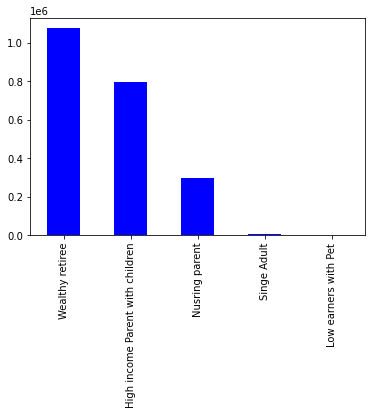

In [45]:
cus_profile_bar = df_high_activities['profile'].value_counts().plot.bar(color =['blue'])

In [46]:
## Save bar chart as image
cus_profile_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_profile_bar.png'))

# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [47]:
#change the column name
df_high_activities.rename(columns={'avg_price':'user_spending'}, inplace=True)


/var/folders/sd/nyqdjc350490q_960k8v0p7m0000gn/T/ipykernel_7752/1779120754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activities.rename(columns={'avg_price':'user_spending'}, inplace=True)


In [48]:
#change the column name
df_high_activities.rename(columns={'median_order_duration':'order_frequency'}, inplace=True)


/var/folders/sd/nyqdjc350490q_960k8v0p7m0000gn/T/ipykernel_7752/2268186014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activities.rename(columns={'median_order_duration':'order_frequency'}, inplace=True)


In [49]:
# Order frequency by customer profile aggregation
df_high_activities.groupby('profile').agg({'order_frequency': ['mean', 'min', 'max']})

order_frequency           
                                            mean  min   max
profile                                                    
High income Parent with children        9.828125  0.0  30.0
Low earners with Pet                   11.460938  2.0  30.0
Nusring parent                          8.750000  0.0  30.0
Singe Adult                             9.617188  2.0  30.0
Wealthy retiree                         9.765625  0.0  30.0

In [50]:
# Using spending by customer profile aggregation
df_high_activities.groupby('profile').agg({'user_spending': ['mean', 'min', 'max']})

user_spending                     
                                          mean       min        max
profile                                                            
High income Parent with children      7.939814  5.156306  20.114286
Low earners with Pet                  7.243254  5.204242   9.758140
Nusring parent                        7.825433  1.425000  15.706667
Singe Adult                           7.890890  6.300000  15.800000
Wealthy retiree                       7.949913  4.370588  12.668000

# 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [51]:
# Create customer profile comparing it with regions (crosstab)
cus_region_profile = pd.crosstab(df_high_activities['region'], df_high_activities['profile'], dropna = False )

In [52]:
cus_region_profile

profile,High income Parent with children,Low earners with Pet,Nusring parent,Singe Adult,Wealthy retiree
region,,,,,
Midwest,191784,204,68709,1594,237230
Northeast,136147,125,52783,1094,187931
South,266422,253,100220,2441,372578
West,202729,292,74133,2320,277791


#### The most of the customers for the six selected groups are located in the southern region, followed by West, Midwest and Noertheastern region except for "Low earner with pet" group which exhibit a different trend

In [53]:
# Create customer profile comparing it with department (goods) (crosstab)
cus_dept_profile = pd.crosstab(df_high_activities['department_goods'], df_high_activities['region'], dropna = False )

In [54]:
cus_dept_profile

region,Midwest,Northeast,South,West
department_goods,,,,
Alcohol,34043,25017,48813,36754
Babies,95741,72712,139511,102428
Bakery,261753,199300,371620,288155
Beverages,598979,462929,859419,650574
Breakfast,156155,117904,223172,173619
Bulk,7929,5599,11180,8743
Canned goods,237459,176936,337458,260221
Dairy eggs,1212490,914616,1723016,1327060
Deli,234464,178398,333620,257352


In [55]:
# Create customer profile comparing it with loyalty_flag (crosstab)
cus_loyal_profile = pd.crosstab(df_high_activities['region'], df_high_activities['loyalty_flag'], dropna = False)

In [56]:
cus_loyal_profile

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2373774,1136761,3750978
Northeast,1841785,842156,2780744
South,3405844,1593664,5311631
West,2662690,1231114,4033423


In [57]:
#Create customer profile comparing it with regions (crosstab)
cus_region_marital_profile = pd.crosstab(df_high_activities['region'], df_high_activities['marital_status'], dropna = False )

In [58]:
cus_region_marital_profile

marital_status,divorced/widowed,living with parents and siblings,married,single
region,,,,
Midwest,617198,351435,5087262,1205618
Northeast,478767,256430,3853773,875715
South,877314,505457,7223749,1704619
West,671992,367850,5578927,1308458


In [59]:
#Create customer profile comparing it with spending (crosstab)
cus_loyalty_spending_profile = pd.crosstab(df_high_activities['loyalty_flag'], df_high_activities['spender_flag'], dropna = False )

In [60]:
cus_loyalty_spending_profile

spender_flag,High spender,Low spender
loyalty_flag,,
Loyal customer,13896,10270197
New customer,36308,4767387
Regular customer,47185,15829591


In [61]:
#Create customer profile comparing it with order frequency (crosstab)
cus_loyalty_frequency_profile = pd.crosstab(df_high_activities['loyalty_flag'], df_high_activities['frequency_flag'], dropna = False )

In [62]:
cus_loyalty_frequency_profile

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
Loyal customer,10270620,0,4133
New customer,1146589,1983500,1526901
Regular customer,8548173,911475,5334079


In [63]:
# Create customer profile comparing it with age profile (crosstab)
cus_loyalty_age_profile = pd.crosstab(df_high_activities['loyalty_flag'], df_high_activities['age_profile'], dropna = False )

In [64]:
cus_loyalty_age_profile

age_profile,Adult,Senior,Young Adult
loyalty_flag,,,
Loyal customer,6416553,2723958,1143582
New customer,2999959,1276659,527077
Regular customer,9937314,4194927,1744535


In [65]:
# Create customer profile comparing it with age profile (crosstab)
cus_marital_age_profile = pd.crosstab(df_high_activities['age_profile'], df_high_activities['marital_status'], dropna = False )

In [66]:
cus_marital_age_profile

marital_status,divorced/widowed,living with parents and siblings,married,single
age_profile,,,,
Adult,623313,0,14461613,4268900
Senior,2021958,0,6173586,0
Young Adult,0,1481172,1108512,825510


In [67]:
# Create departmental good profile comparing it with income profile (crosstab)
cus_goods_incom_profile = pd.crosstab(df_high_activities['department_goods'], df_high_activities['income_profile'], dropna = False )

In [68]:
cus_goods_incom_profile

income_profile,Low income,Middle income,Upper income
department_goods,,,
Alcohol,19346,106810,18471
Babies,34026,339345,37021
Bakery,118157,896198,106473
Beverages,413096,1936487,222318
Breakfast,99160,514060,57630
Bulk,5060,25988,2403
Canned goods,88560,829785,93729
Dairy eggs,555091,4159092,462999
Deli,116835,798206,88793


In [69]:
#Create customer profile comparing it with spending (crosstab)
cus_profile_spending_profile = pd.crosstab(df_high_activities['profile'], df_high_activities['spender_flag'], dropna = False )

In [70]:
cus_profile_spending_profile

spender_flag,High spender,Low spender
profile,,
High income Parent with children,2905,794177
Low earners with Pet,0,874
Nusring parent,221,295624
Singe Adult,38,7411
Wealthy retiree,3821,1071709


# 9. Produce suitable charts to illustrate your results and export them in your project folder.

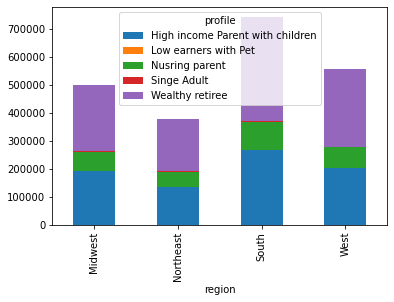

In [71]:
# Plot stacked bar chart of customer profile/regions crosstab
cus_region_profile = cus_region_profile.plot(kind = 'bar', stacked = True)

In [72]:
# Export image
cus_region_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_regional_profile_bar.png'))

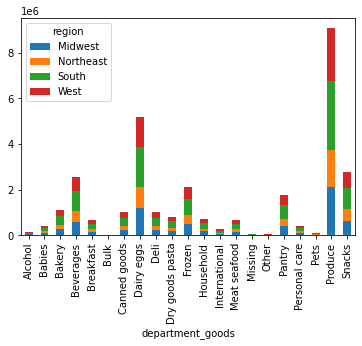

In [73]:
# Plot stacked bar chart of regional profile/ department_good crosstab
cus_dept_profile = cus_dept_profile.plot(kind = 'bar', stacked = True)

In [74]:
# Export image
cus_dept_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_regional_goods_profile_bar.png'))

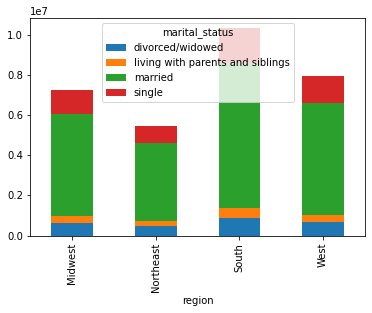

In [75]:
# Plot stacked bar chart of regional profile/ marital_profile crosstab
cus_region_marital_profile = cus_region_marital_profile.plot(kind = 'bar', stacked = True)

In [76]:
# Export image
cus_region_marital_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_regional_marital_profile_bar.png'))

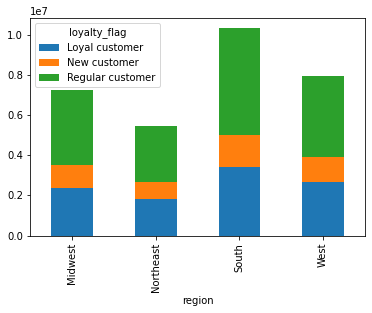

In [77]:
# Plot stacked bar chart of regional profile/ loyalty crosstab
cus_loyal_profile = cus_loyal_profile.plot(kind = 'bar', stacked = True)

In [78]:
# Export image
cus_loyal_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_regional_loyalty_profile_bar.png'))

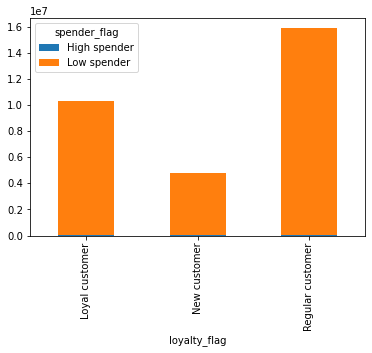

In [79]:
# Plot stacked bar chart of spending profile/ loyalty crosstab
cus_loyalty_spending_profile = cus_loyalty_spending_profile.plot(kind = 'bar', stacked = True)

In [80]:
# Export image
cus_loyalty_spending_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_loyalty_speding_profile_bar.png'))

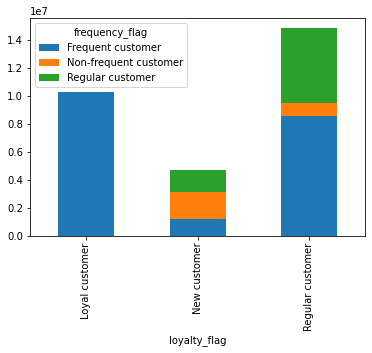

In [81]:
# Plot stacked bar chart of frequency profile/ loyalty crosstab
cus_loyalty_frequency_profile = cus_loyalty_frequency_profile.plot(kind = 'bar', stacked = True)

In [82]:
# Export image
cus_loyalty_frequency_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_loyalty_frequency_profile_bar.png'))

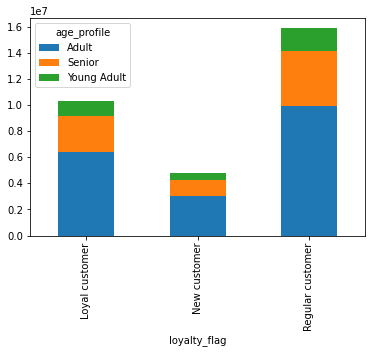

In [83]:
# Plot stacked bar chart of age profile/ loyalty crosstab
cus_loyalty_age_profile = cus_loyalty_age_profile.plot(kind = 'bar', stacked = True)

In [84]:
# Export image
cus_loyalty_age_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_loyalty_age_profile_bar.png'))

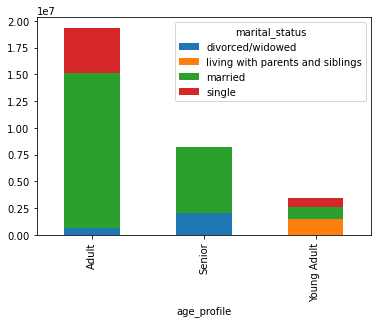

In [85]:
# Plot stacked bar chart of age profile/ marital status crosstab
cus_marital_age_profile = cus_marital_age_profile.plot(kind = 'bar', stacked = True)

In [86]:
# Export image
cus_marital_age_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_marital_age_profile_bar.png'))

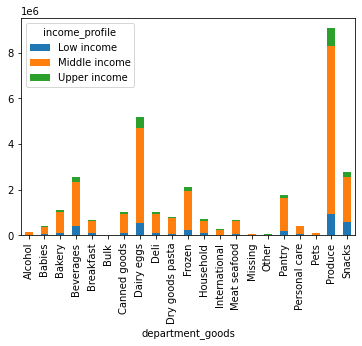

In [87]:
# Plot stacked bar chart of department goods profile/ income crosstab
cus_goods_incom_profile = cus_goods_incom_profile.plot(kind = 'bar', stacked = True)

In [88]:
# Export image
cus_goods_incom_profile = cus_goods_incom_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'goods_incpme_profile_bar.png'))

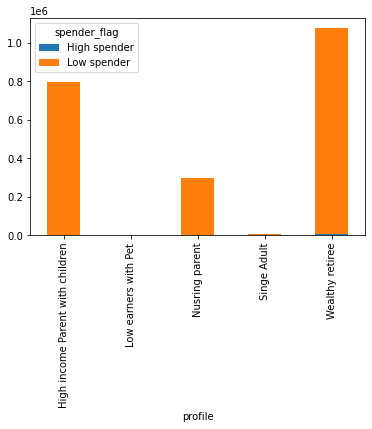

In [89]:
# Plot stacked bar chart of customer profile/ spending crosstab
cus_profile_spending_profile = cus_profile_spending_profile.plot(kind = 'bar', stacked = True)

In [90]:
# Export image
cus_profile_spending_profile = cus_profile_spending_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Customer_profile_spending_bar.png'))

In [2]:
# customer loyalty pie chart
#cus_profile_bar = df_high_activities['loyalty_flag'].value_counts().plot.bar(color =['blue','red','green'])

# 10. Tidy up your script, export your final data set, and save your notebook.

In [92]:
#Export data to pkl
df_high_activities.to_pickle(os.path.join(path,'02 Data','Prepared Data','high_activity_customers.pkl'))